<a href="https://colab.research.google.com/github/farshidzfq/Red-Object-Detection-using-OpenCV/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-01-19 20:25:49--  https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 576216 (563K) [image/jpeg]
Saving to: ‘red_object.jpg’

red_object.jpg      100%[===================>] 562.71K  --.-KB/s    in 0.02s   

2025-01-19 20:25:49 (29.4 MB/s) - ‘red_object.jpg’ saved [576216/576216]



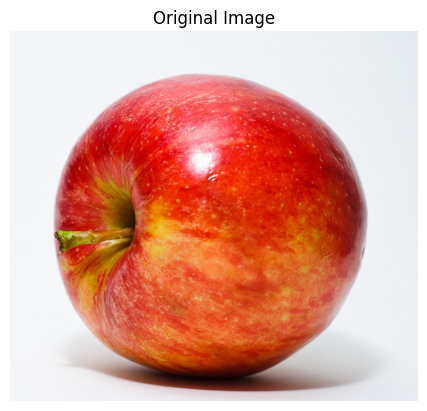

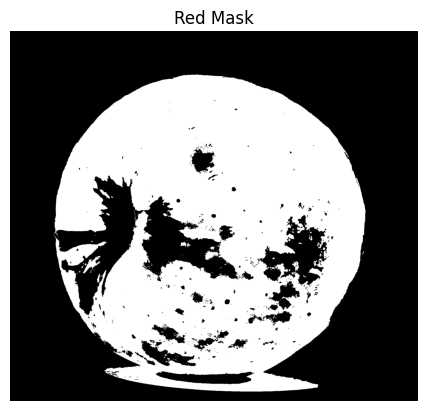

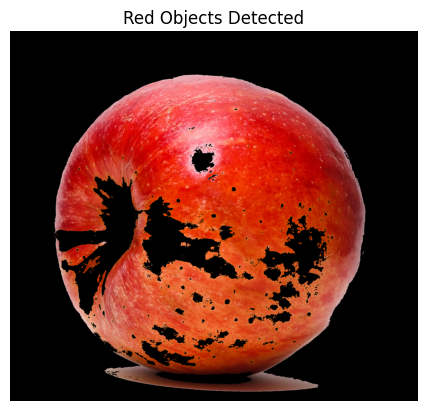

In [1]:
# نصب کتابخانه OpenCV (در صورت نیاز)
!pip install opencv-python-headless

# وارد کردن کتابخانه‌های لازم
import cv2
import numpy as np
import matplotlib.pyplot as plt

# بارگذاری تصویر (لطفاً مسیر تصویر خود را جایگزین کنید)
from google.colab.patches import cv2_imshow  # برای نمایش تصویر در Colab

# ایجاد تصویر نمونه (می‌توانید مسیر تصویر خود را قرار دهید)
!wget https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg -O red_object.jpg

# خواندن تصویر
image = cv2.imread("red_object.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # تبدیل به فرمت RGB

# نمایش تصویر اصلی
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# تبدیل تصویر به فضای رنگ HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# تعریف محدوده رنگ قرمز (پایین و بالا)
lower_red1 = np.array([0, 50, 50])   # محدوده پایین (قرمز روشن)
upper_red1 = np.array([10, 255, 255])  # محدوده بالا (قرمز روشن)

lower_red2 = np.array([170, 50, 50])  # محدوده پایین (قرمز تیره)
upper_red2 = np.array([180, 255, 255])  # محدوده بالا (قرمز تیره)

# ایجاد ماسک برای رنگ قرمز
mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = mask1 | mask2  # ترکیب دو ماسک

# نمایش ماسک نهایی
plt.imshow(red_mask, cmap="gray")
plt.title("Red Mask")
plt.axis("off")
plt.show()

# اعمال ماسک روی تصویر اصلی
red_only = cv2.bitwise_and(image, image, mask=red_mask)

# نمایش تصویر نهایی
plt.imshow(red_only)
plt.title("Red Objects Detected")
plt.axis("off")
plt.show()
